#https://www.youtube.com/watch?v=MmC4b7gPY0Q&list=PL4vZYKhVIgAaUSviESMkPYmQeC5CNuodP&index=4&t=0s

In [34]:
import pandas as pd
from matplotlib import pyplot
from pylab import rcParams
series = pd.read_csv('Houston_weather.csv', header=0, index_col=0, parse_dates=[0])
print(series.head())

            Av_Temp
Date               
2009-01-01     59.1
2009-01-02     68.8
2009-01-03     71.8
2009-01-04     67.5
2009-01-05     45.7


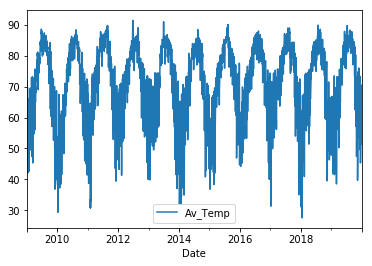

In [35]:
series.plot()
pyplot.show()

In [36]:
type(series)

pandas.core.frame.DataFrame

,Av_Temp
count,4017.000000
mean,70.746428
std,12.618903
min,27.500000
25%,62.300000
50%,73.000000
75%,81.600000
max,91.500000


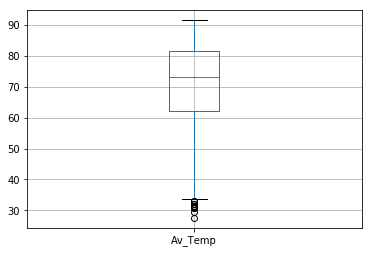

In [37]:
series_values = series.values
series.boxplot()
series.describe()

In [38]:
rolling_mean = series.rolling(window=20).mean()

Text(0.5, 1.0, 'Rolling Mean')

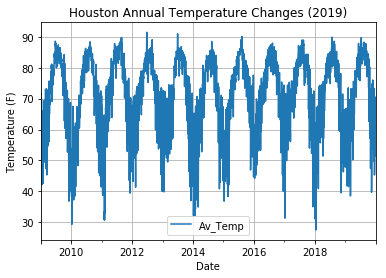

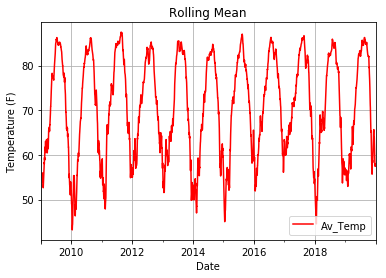

In [39]:
series.plot(grid=True)
pyplot.ylabel("Temperature (F)")
pyplot.title("Houston Annual Temperature Changes (2019)")
rolling_mean.plot(grid=True, color="Red")
pyplot.ylabel("Temperature (F)")
pyplot.title("Rolling Mean")


In [40]:
series.describe()  # mean is an indication of future prediction values

,Av_Temp
count,4017.000000
mean,70.746428
std,12.618903
min,27.500000
25%,62.300000
50%,73.000000
75%,81.600000
max,91.500000


In [41]:
# Option-1
values = pd.DataFrame(series_values)
df_values = pd.concat([values,values.shift(1)],axis=1)
df_values.columns = ['Av_Temp','Forecast_Av_Temp']

In [42]:
# # Option-2
# df_values = pd.concat([series['Births'],series['Births'].shift(1)],axis=1)
# df_values.columns = ['Births','Forecast_Birth']

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
df_values.head()

,Av_Temp,Forecast_Av_Temp
0,59.1,NaN
1,68.8,59.1
2,71.8,68.8
3,67.5,71.8
4,45.7,67.5


In [44]:
# Remove 'NAN' records, such as in the first row
df_test = df_values[1:]

# Also remove Outliers from data values


In [45]:
data_error = mean_squared_error(df_test.Av_Temp, df_test.Forecast_Av_Temp)

In [46]:
data_error

26.512739043824702

In [47]:
# +- 5.6 magnitudes for every forecast
np.sqrt(data_error)


5.149052247144585

In [48]:
#ARIMA (Autoregressive Integrated (d) Average)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

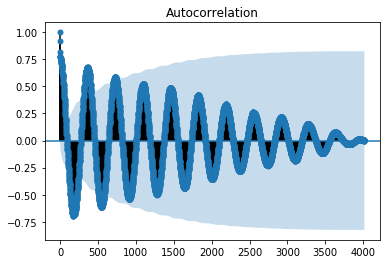

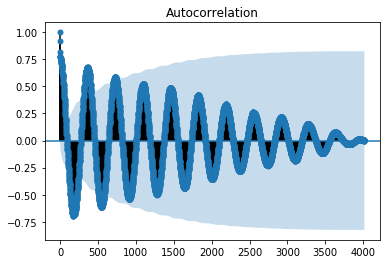

In [49]:
# plot_acf is to identify parameter Q
# ARIMA(p,d,q)
plot_acf(series)


In [50]:
# # plot_acf is to identify parameter P
# # ARIMA(p,d,q)
# plot_pacf(series)
# # p = 2,3  # d = 1  # q = 2,3

In [51]:
#Option-1
#Split the data into train and test
#size = int(len(series) * 0.66)
#series_train, series_test = series[0:size], series[size:]


In [52]:
#Option-2
#Split the data into train and test
sizes = int(series.size*0.66)
print(sizes)
series_train = series[0:sizes]
series_test = series[sizes:]

2651


In [53]:
from statsmodels.tsa.arima_model import ARIMA

# p = 2,3  # d = 1  # q = 3,4
# Play with different combination of ordering (p,d,q)
# The ordering with the lowest aic is the best model
model = ARIMA(series,order=(2,1,4))

C:\Users\Suleyman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Suleyman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Suleyman\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [54]:
model_fit = model.fit()

In [55]:
# model_fit.save("model_weather.h5")

In [56]:
from sklearn.externals import joblib

In [57]:
joblib.dump(model_fit, 'model_weather')

['model_weather']

In [58]:
model_fit.aic

23648.921642508452

In [59]:
series.tail()

,Av_Temp
Date,
2019-12-27,63.7
2019-12-28,70.5
2019-12-29,63.7
2019-12-30,52.3
2019-12-31,51.9


In [60]:
print(series.index[-1])

2019-12-31 00:00:00


In [101]:
import datetime
from datetime import timedelta
#lastdate = '2019-12-31'  # Make sure it is a date format
# lastdate = datetime.datetime.strptime(lastdate, '%Y-%m-%d')
lastdate = series.index[-1]
future_date = datetime.datetime.strptime('2020-01-16', '%Y-%m-%d')
datediff = (future_date - lastdate).days
forecast = model_fit.forecast(steps=datediff)[0]
print("My forecast for {} is {}".format(future_date,forecast[-1]))

My forecast for 2020-01-16 00:00:00 is 57.81385226538416


In [102]:
forecast

array([55.64776586, 57.70118047, 58.05081674, 57.93281041, 57.83584965,
       57.80885537, 57.80960899, 57.81335605, 57.8147999 , 57.81485109,
       57.81459493, 57.81438592, 57.81423742, 57.81410914, 57.81398181,
       57.81385227])

In [63]:
# Check error
# quakeforecast = model_fit.forecast(steps = 35)[0]
# quakeforecast

In [64]:
# series_test

In [65]:
# np.sqrt(mean_squared_error(series_test,quakeforecast))

In [66]:
import datetime
from datetime import timedelta
# #lastdate = '1959-12-31'  # Make sure it is a date format
# # lastdate = datetime.datetime.strptime(lastdate, '%Y-%m-%d')
# # lastdate = series.index[-1]
# # future_date = datetime.datetime.strptime('2020-01-12', '%Y-%m-%d')
# # datediff = (future_date - lastdate).days
# # forecast = model_fit.forecast(steps=datediff)[0]
# # print("My forecast for {} is {}".format(future_date,forecast[-1]))

for f in forecast:
   lastdate = lastdate + timedelta(days=1)
   print('{} = {}'.format(lastdate,f))
   lastdate = lastdate + timedelta(days=1)
   if lastdate==future_date:
       print('{} = {}'.format(lastdate,f))
       break

2020-01-01 00:00:00 = 55.6477658640103
2020-01-03 00:00:00 = 57.70118047040049
2020-01-05 00:00:00 = 58.05081674198963
2020-01-07 00:00:00 = 57.93281040764958
2020-01-09 00:00:00 = 57.83584965018649
2020-01-11 00:00:00 = 57.808855366428716
2020-01-13 00:00:00 = 57.80960898999595
2020-01-15 00:00:00 = 57.81335605204781
2020-01-17 00:00:00 = 57.81479990248825
2020-01-19 00:00:00 = 57.81485108749479
2020-01-21 00:00:00 = 57.81459493092918
2020-01-23 00:00:00 = 57.814385924334566
2020-01-25 00:00:00 = 57.814237417414326
2020-01-27 00:00:00 = 57.81410914000494
2020-01-29 00:00:00 = 57.81398181106671
2020-01-31 00:00:00 = 57.81385226538416
2020-02-02 00:00:00 = 57.813721630570534
2020-02-04 00:00:00 = 57.81359080942211
2020-02-06 00:00:00 = 57.81346004868387
2020-02-08 00:00:00 = 57.813329338490924
2020-02-10 00:00:00 = 57.813198642466496
2020-02-12 00:00:00 = 57.81306794604394
2020-02-14 00:00:00 = 57.81293724760591
2020-02-16 00:00:00 = 57.812806548341506
2020-02-18 00:00:00 = 57.812675848

In [34]:
forecast = pd.DataFrame(forecast)
forecast.head()

,0
0,56.299636
1,57.388390
2,57.131964
3,57.091134
4,57.016177


In [35]:
forecast.rename(columns = {0:'Avr. Temperature'}, inplace = True)
forecast.index.name = 'Days'
forecast.head()

,Avr. Temperature
Days,
0,56.299636
1,57.388390
2,57.131964
3,57.091134
4,57.016177


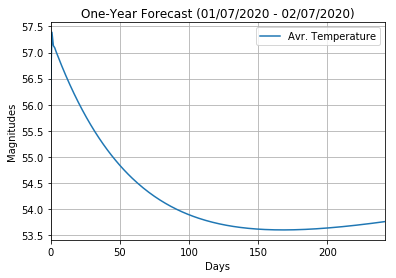

In [36]:
forecast.plot()
pyplot.ylabel('Magnitudes')
pyplot.title('One-Year Forecast (01/07/2020 - 02/07/2020)')
pyplot.grid(True)
# rcParams['figure.figsize'] = 10, 4
pyplot.savefig('One_Month_Forecast.png')
pyplot.show()